In [10]:
import pandas as pd

def get_human_dataset():
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv(
        './assets/human_activity/features.txt',
        sep='\s+',
        header=None,
        names=['column_index', 'column_name']
    )

    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체
    # 로 다시 변환
    feature_name = feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv(
        './assets/human_activity/train/X_train.txt',
        sep='\s+',
        header=None,
        # names=feature_name
    )

    X_test = pd.read_csv(
        './assets/human_activity/test/X_test.txt',
        sep='\s+',
        header=None,
        # names=feature_name
    )

    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv(
        './assets/human_activity/train/y_train.txt',
        sep='\s+',
        header=None,
        # names=['action'],
    )

    y_test = pd.read_csv(
        './assets/human_activity/test/y_test.txt',
        sep='\s+',
        header=None,
        # names=['action'],
    )
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\s'
<>:41: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\s'
<>:41: SyntaxWarning: invalid escape sequence '\s'
/var/folders/6h/yz_7x6lx13x2cdhh1474_z3w0000gn/T/ipykernel_82066/1111315041.py:7: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
/var/folders/6h/yz_7x6lx13x2cdhh1474_z3w0000gn/T/ipykernel_82066/1111315041.py:19: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
/var/folders/6h/yz_7x6lx13x2cdhh1474_z3w0000gn/T/ipykernel_82066/1111315041.py:26: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
/var/folders/6h/yz_7x6lx13x2cdhh1474_z3w0000gn/T/ipykernel_82066/11113150

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()을 이용해 학습/테스트용 DataFrame 반환

X_train, X_test, y_train, y_test = get_human_dataset()


# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9223


In [12]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))


rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10,
min_samples_leaf=8, min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

/opt/anaconda3/envs/ml-lecture/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/ml-lecture/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/ml-lecture/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/ml-lecture/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d a

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9172
예측 정확도: 0.9162


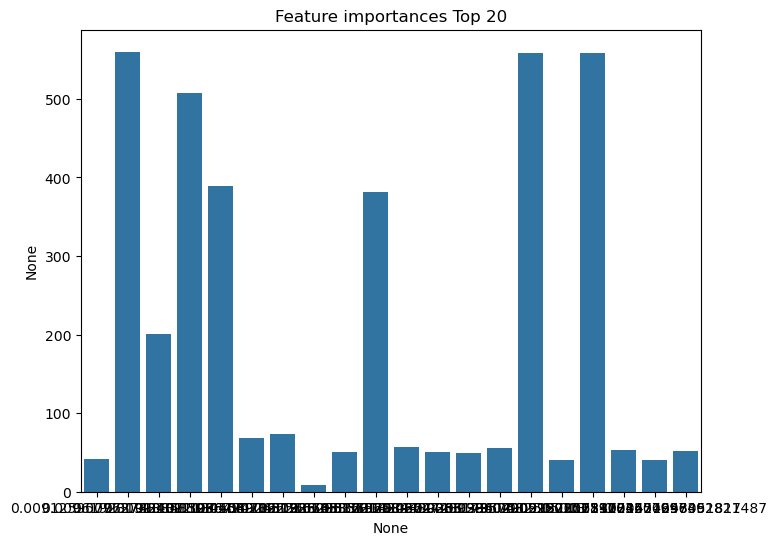

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [14]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
clf = AdaBoostClassifier(n_estimators=30,
random_state=10,
learning_rate=0.1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print('AdaBoost 정확도: {:.4f}'.format(accuracy_score(y_test, pred)))

AdaBoost 정확도: 0.5310
